In [14]:
import numpy as np
import pickle
import time
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
from iminuit import Minuit, cost
from iminuit.cost import LeastSquares
hep.style.use("CMS")

In [2]:
run_start = 1
run_end = 1
boards = 3
input_PTRIG_name = 'PTRIG.txt'

output_file_name = 'Run1.pickle'


In [8]:
Brd = []
Ch = []
LG = []
HG = []

with open(input_PTRIG_name) as f:
    lines = f.read().split('\n')

    last_tstamp = 0  # Initialize last timestamp for continuity across files

    for i, line in enumerate(lines):
        if i > 8:
            data = line.split()

            if len(data) == 6:
                Brd.append(int(data[2]))
                Ch.append(int(data[3]))
                LG.append(int(data[4]))
                HG.append(int(data[5]))
            elif len(data) == 4:
                Brd.append(int(data[0]))
                Ch.append(int(data[1]))
                LG.append(int(data[2]))
                HG.append(int(data[3]))

Brd = np.array(Brd)
Ch = np.array(Ch)
LG = np.array(LG)
HG = np.array(HG)

In [102]:
def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((data - y)**2)

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def plot_histograms_ptrig(board_number, events, ch, brd, brd_num):
    # Create subplots for each channel
    fig, axs = plt.subplots(8, 8, figsize=(16, 16))
    fig.suptitle(f'Board {board_number} - LG Histograms', fontsize=20, y = 1)
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    
    ptrigs = []
    ptrigmeans = []
    ptrigsigmas = []
    
    for i in range(8):
        for j in range(8):
            channel_number = i * 8 + j
            mask = (ch == channel_number) & (brd == brd_num) & (events < 400) & (events > 0)
            
            # Create histogram
            h, bins = np.histogram(events[mask], bins=400, range=(0, 400))
            bin_centers = 0.5 * (bins[:-1] + bins[1:])
            errors = np.sqrt(h)
            
            # Plot error bar plot
            axs[i, j].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
        
            axs[i, j].set_title(f'Channel {channel_number}', fontsize = 10, pad=-15, loc='center')
            
            #initial_params = [max(h),np.mean(events[mask]),np.std(events[mask])]
            #mask = h > 0
            
            #m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
            # Set limits for the sigma parameter
            #m.limits["sigma"] = (0, None)
            # Perform the fit
            #m.migrad()
            # Get the fitted parameters
            #fitted_params = m.values
            
            #A_fit = fitted_params['A']
            #mu_fit = fitted_params['mu']
            #sigma_fit = fitted_params['sigma']
            
            A_fit = max(h)
            if len(events[mask]) == 0:
                mu_fit = 0
                sigma_fit = 100
                print("Empty Channel")
            else:
                mu_fit = np.mean(events[mask])
                sigma_fit = np.std(events[mask])
    
            ptrigsigmas.append(sigma_fit)
            ptrigmeans.append(mu_fit)
    
            x = np.linspace(0, 400, 1000)
            y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
            
            x = np.linspace(0, 400, 1000)
            y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
            axs[i, j].plot(x, y_fit, 'tab:orange', label='Fit')
            #axs[i, j].set_yscale("log") 
            
            # Set labels
            if i == 7:  # Bottom most row
                axs[i, j].set_xlabel('Value [ADC]', fontsize = 10)
            if j == 0:  # Left most column
                axs[i, j].set_ylabel('Count', fontsize = 10)

    # Adjust layout   
    plt.tight_layout(pad=0.0)
    plt.subplots_adjust(hspace=0.0, wspace=0.0)
 
    plt.show()
    ptrigs.append(ptrigmeans)
    ptrigs.append(ptrigsigmas)
    return ptrigs

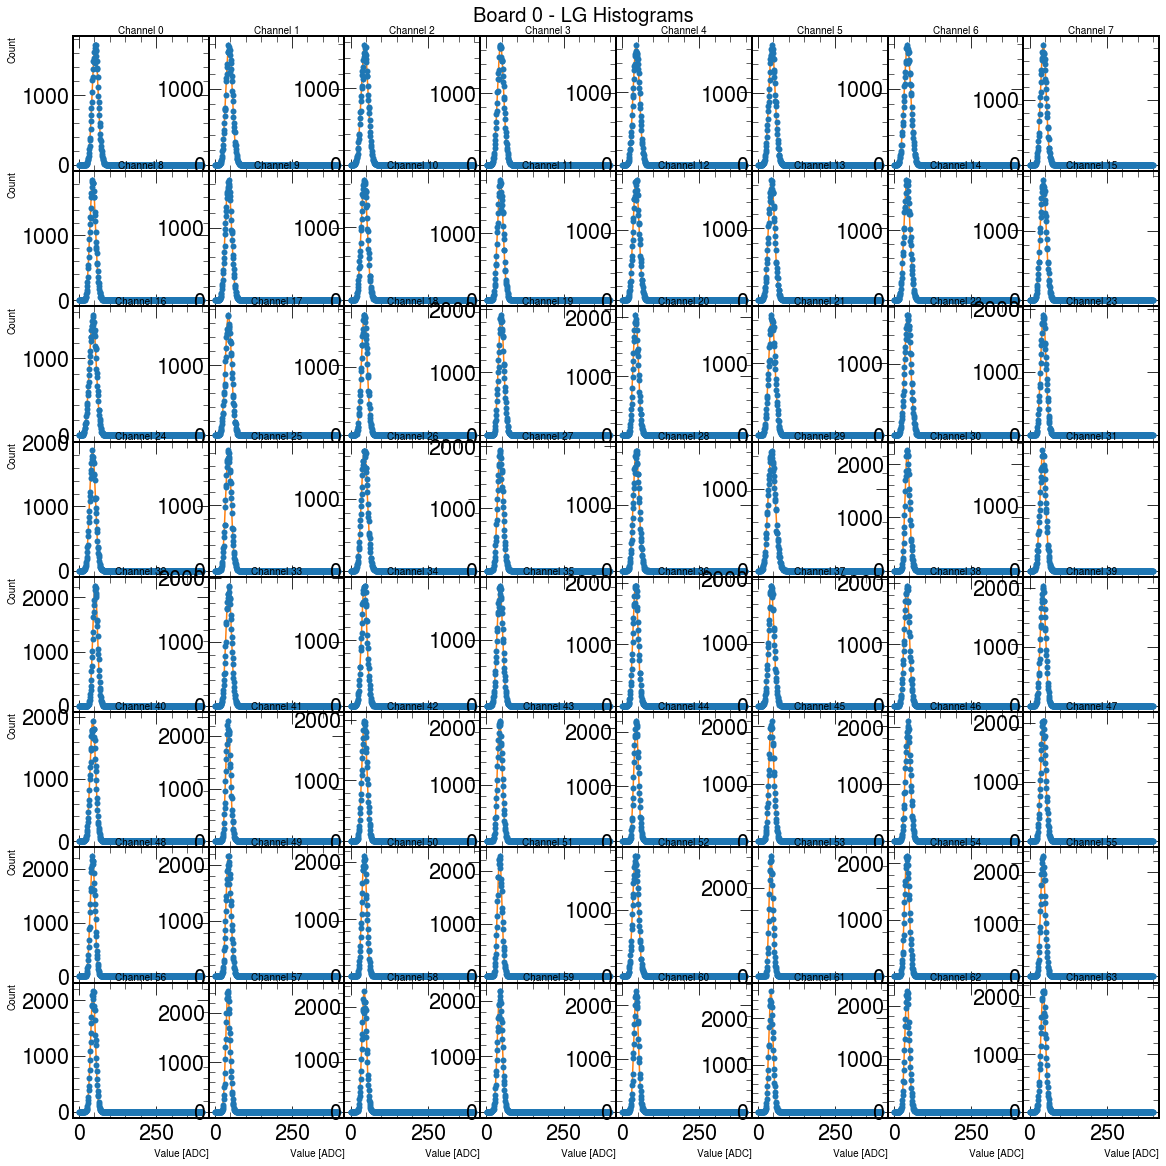

In [103]:
board_number = 0
LGptrigs = []
LGptrigs.append(plot_histograms_ptrig(board_number, LG, Ch, Brd, board_number))

Empty Channel
Empty Channel
Empty Channel
Empty Channel


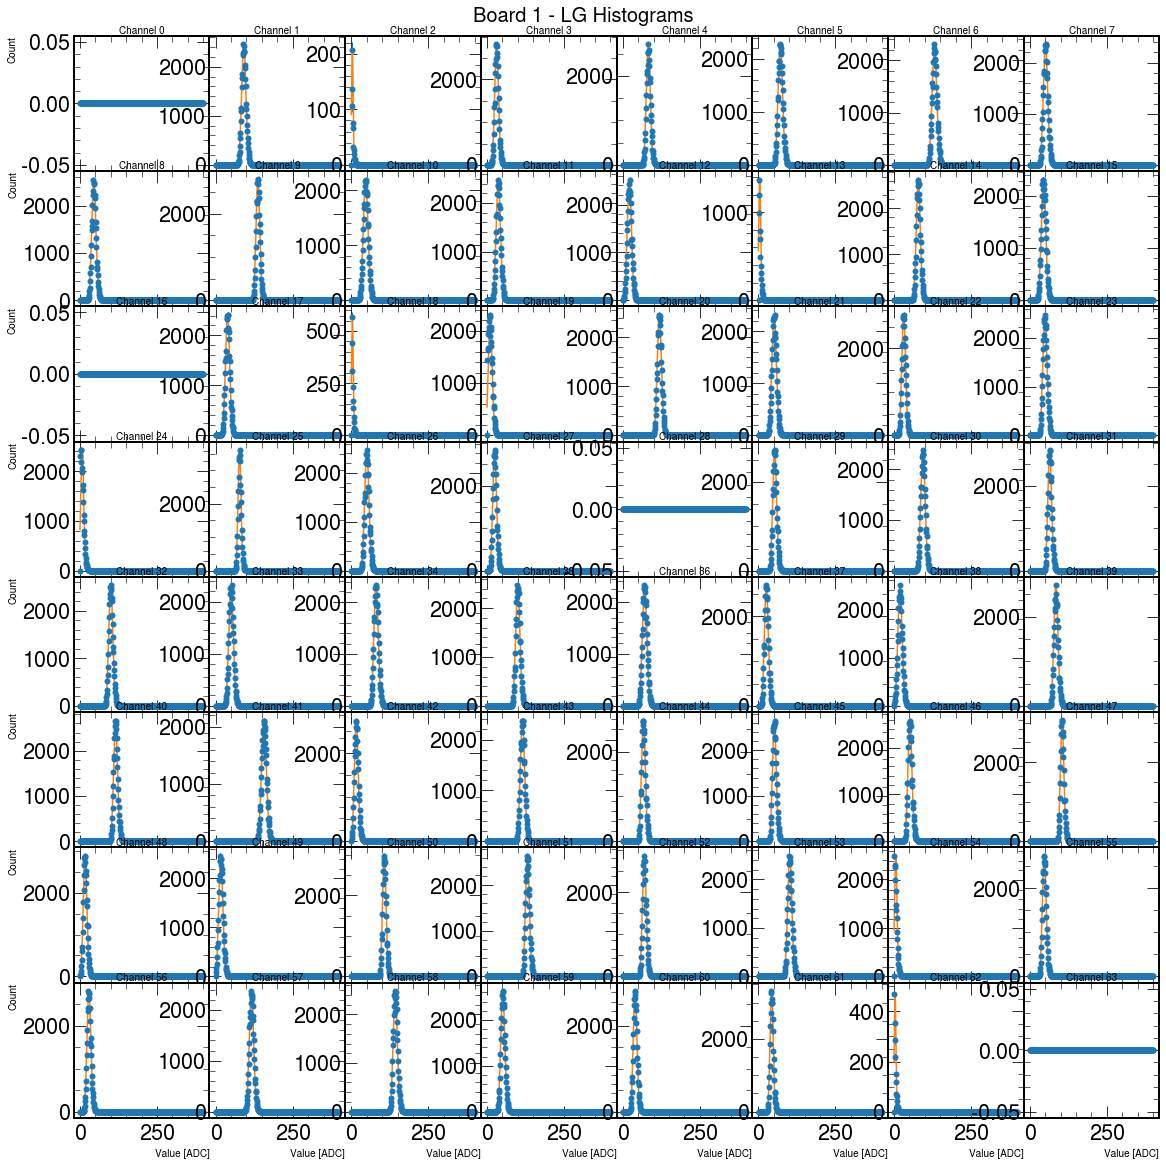

In [104]:
board_number = 1
LGptrigs.append(plot_histograms_ptrig(board_number, LG, Ch, Brd, board_number))

Empty Channel
Empty Channel


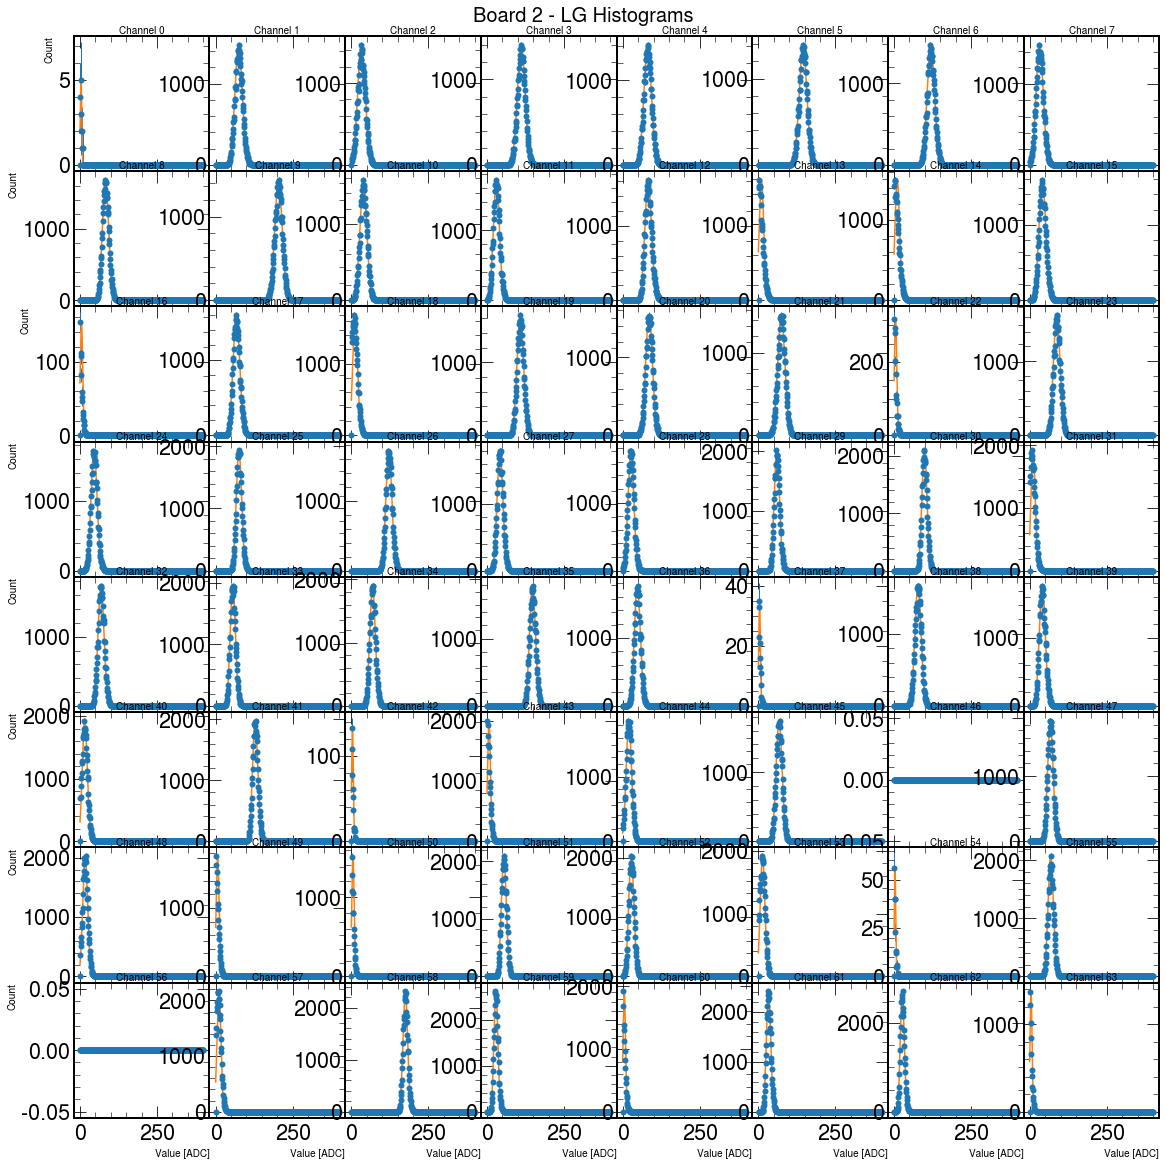

In [105]:
board_number = 2
LGptrigs.append(plot_histograms_ptrig(board_number, LG, Ch, Brd, board_number))

/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan


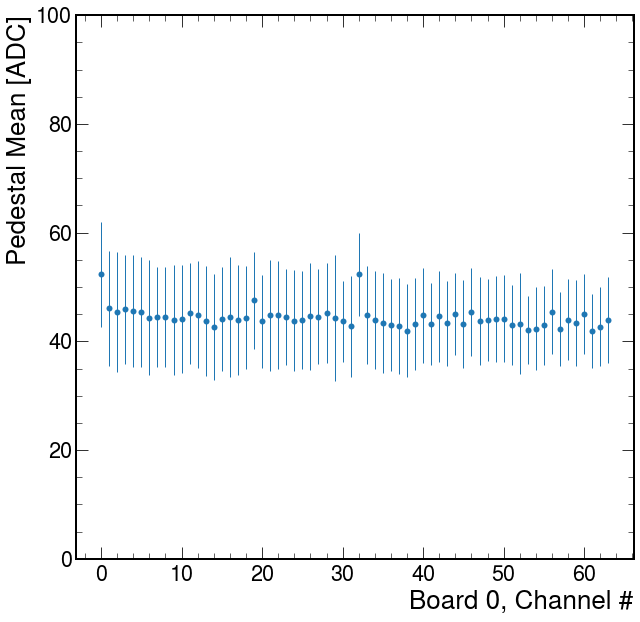

In [106]:
plt.errorbar(range(0,64), LGptrigs[0][0], yerr=LGptrigs[0][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,100)
plt.xlabel("Board 0, Channel #")
plt.ylabel("Pedestal Mean [ADC]")
print(np.mean(ptrigs0[0]))

Text(0, 1, 'Pedestal Mean [ADC]')

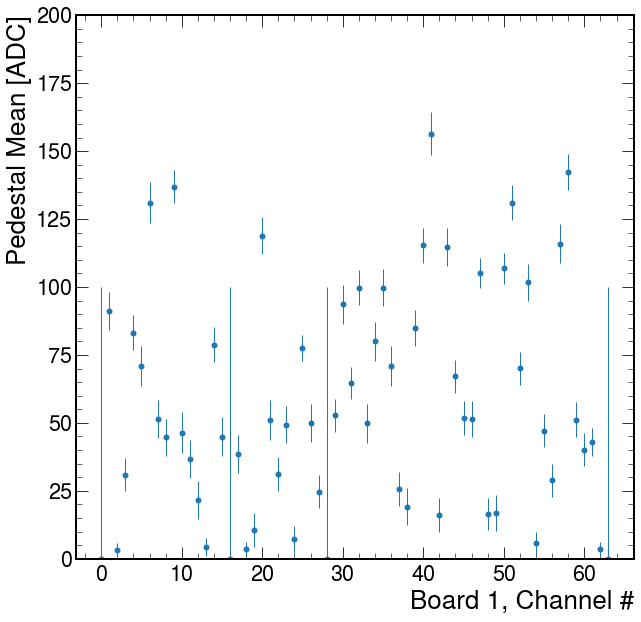

In [107]:
plt.errorbar(range(0,64), LGptrigs[1][0], yerr=LGptrigs[1][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,200)
plt.xlabel("Board 1, Channel #")
plt.ylabel("Pedestal Mean [ADC]")

Text(0, 1, 'Pedestal Mean [ADC]')

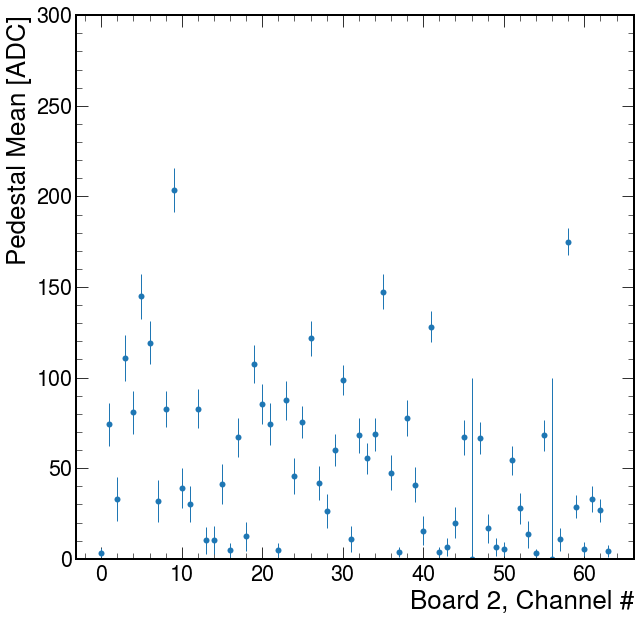

In [108]:
plt.errorbar(range(0,64), LGptrigs[2][0], yerr=LGptrigs[2][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,300)
plt.xlabel("Board 2, Channel #")
plt.ylabel("Pedestal Mean [ADC]")

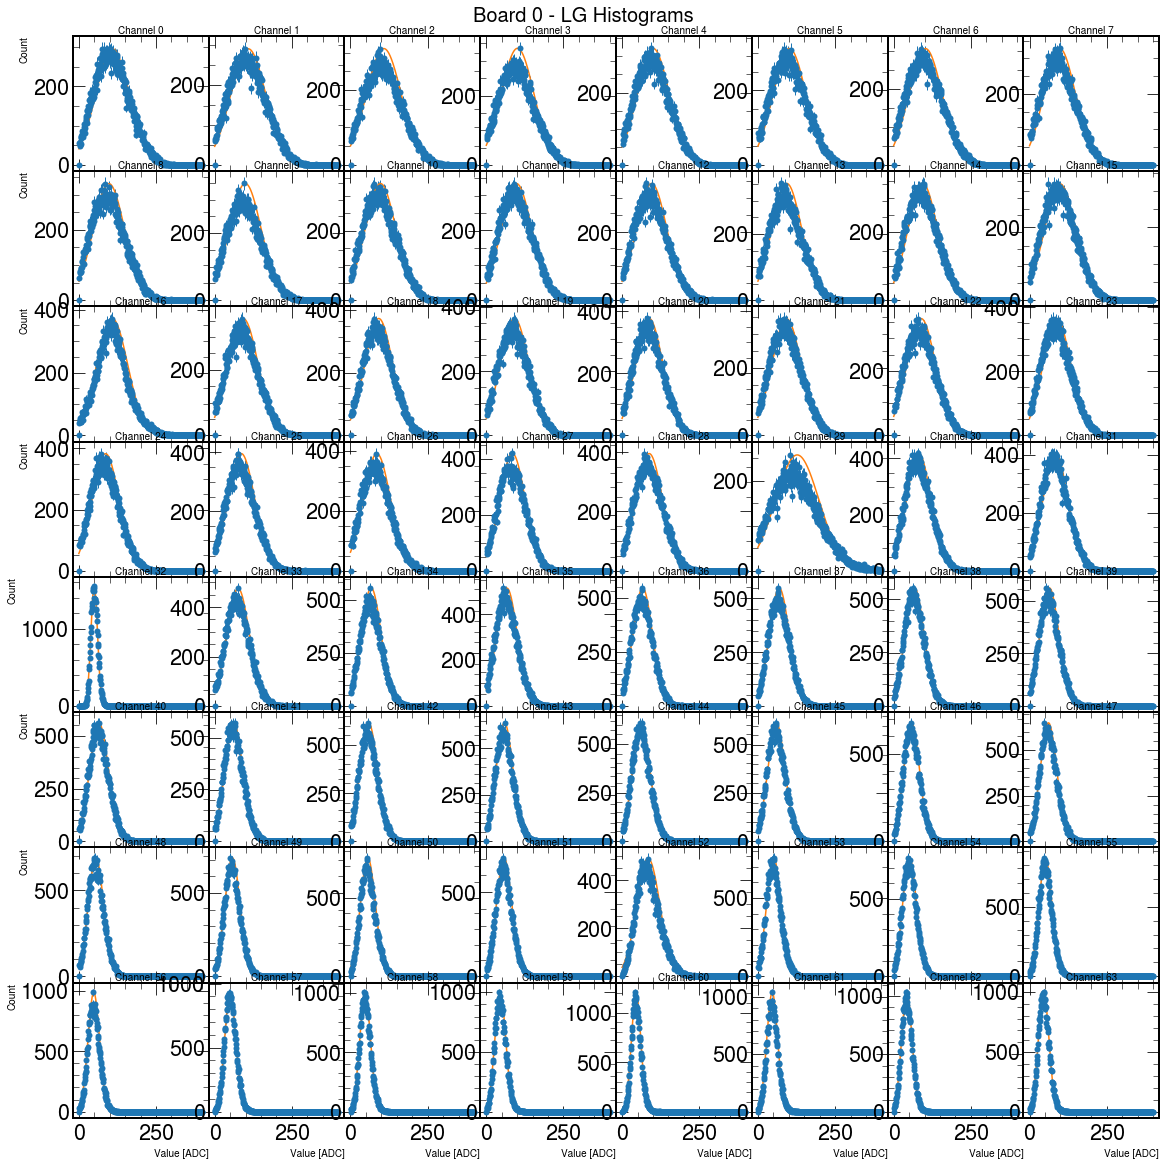

In [109]:
board_number = 0
HGptrigs = []
HGptrigs.append(plot_histograms_ptrig(board_number, HG, Ch, Brd, board_number))

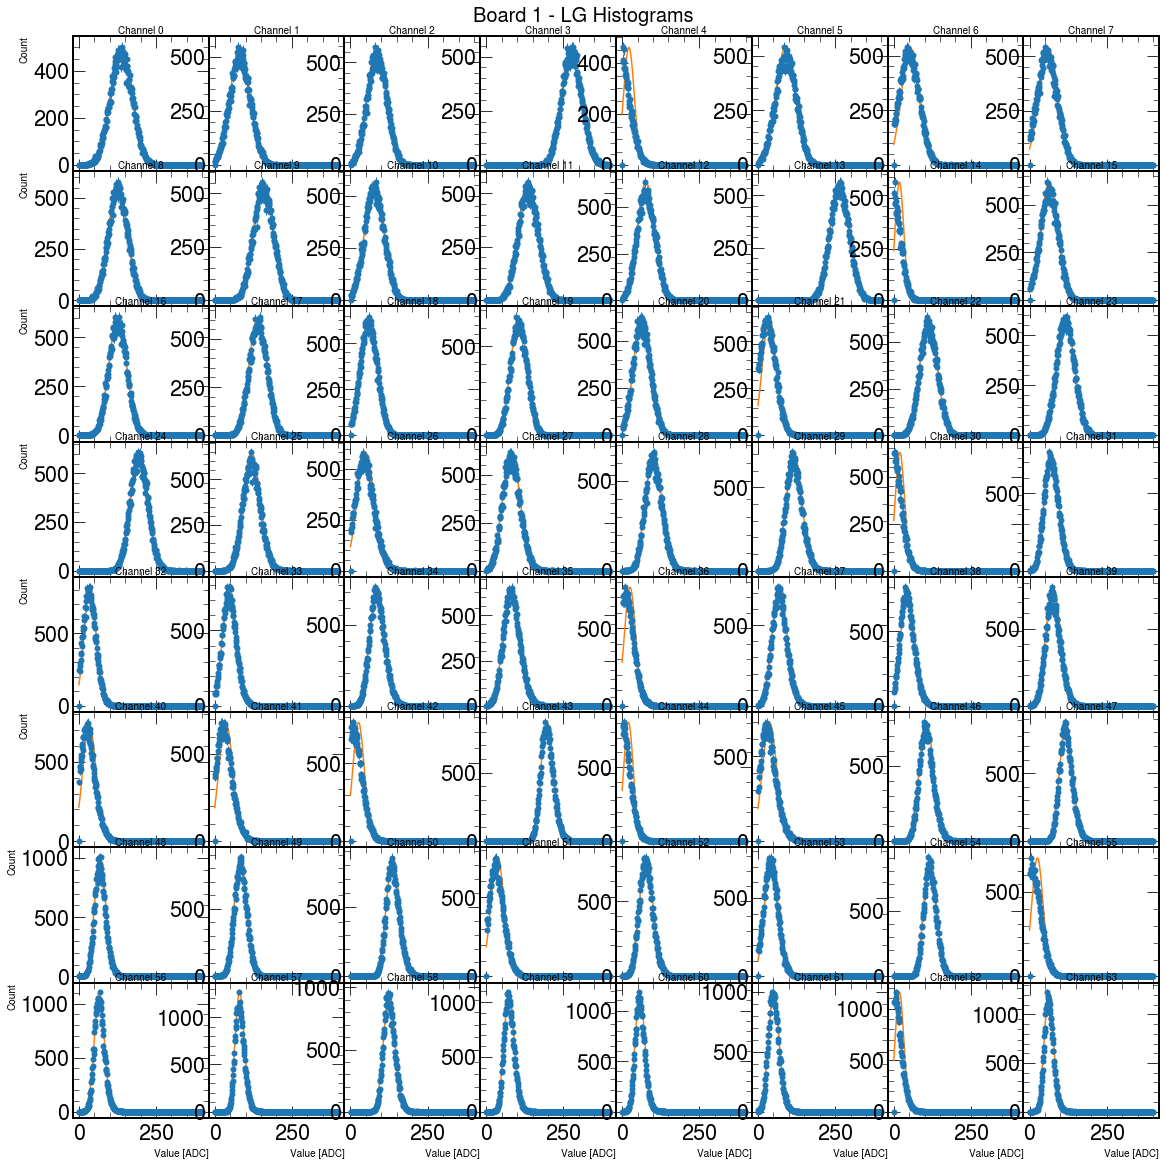

In [110]:
board_number = 1
HGptrigs.append(plot_histograms_ptrig(board_number, HG, Ch, Brd, board_number))

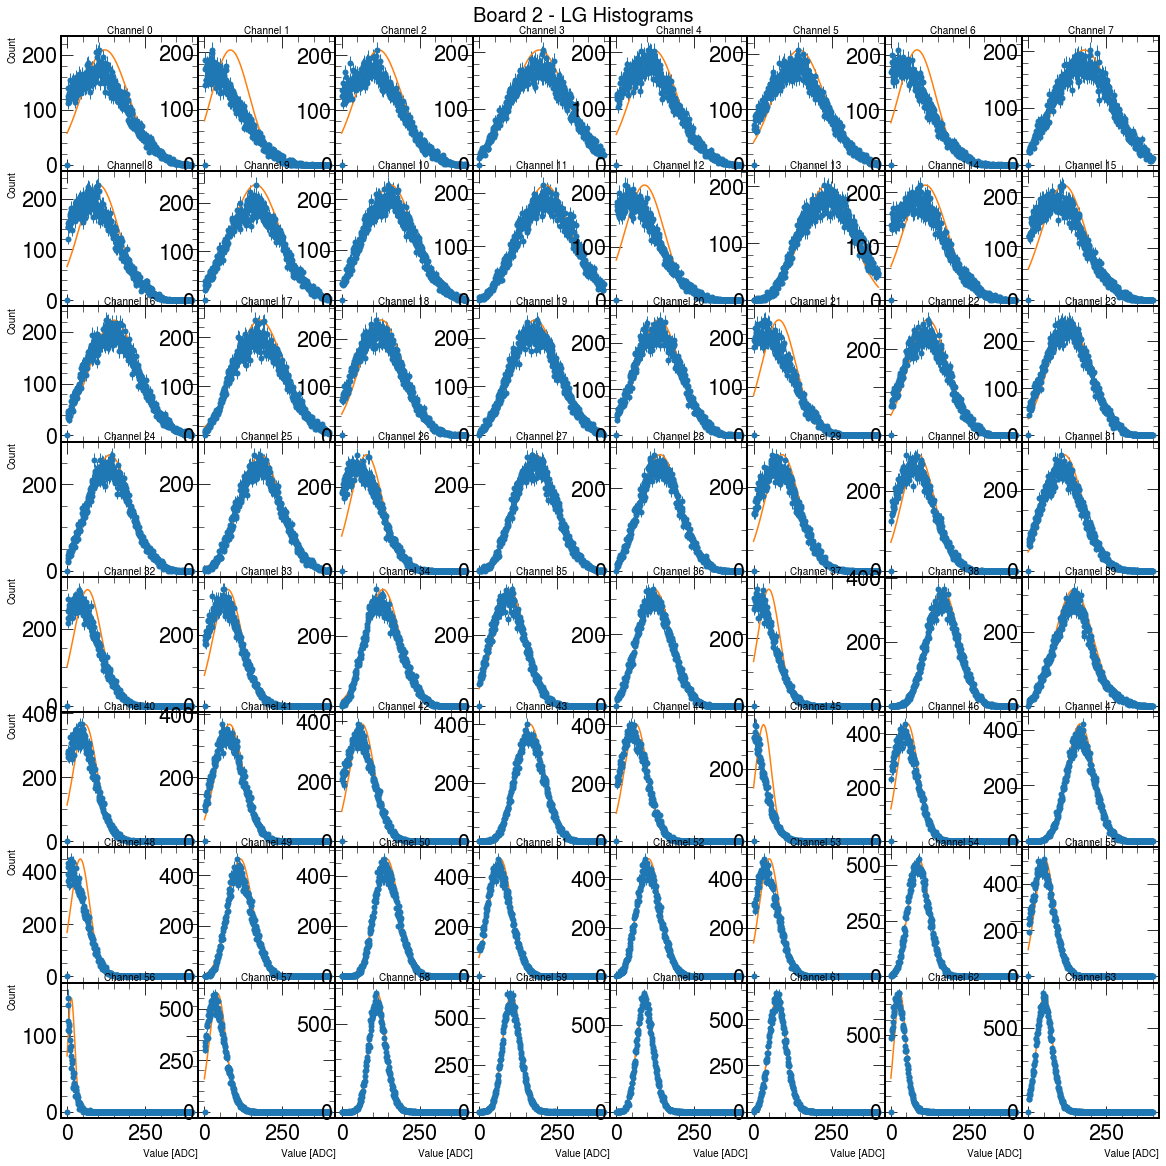

In [111]:
board_number = 2
HGptrigs.append(plot_histograms_ptrig(board_number, HG, Ch, Brd, board_number))

Text(0, 1, 'HG Pedestal Mean [ADC]')

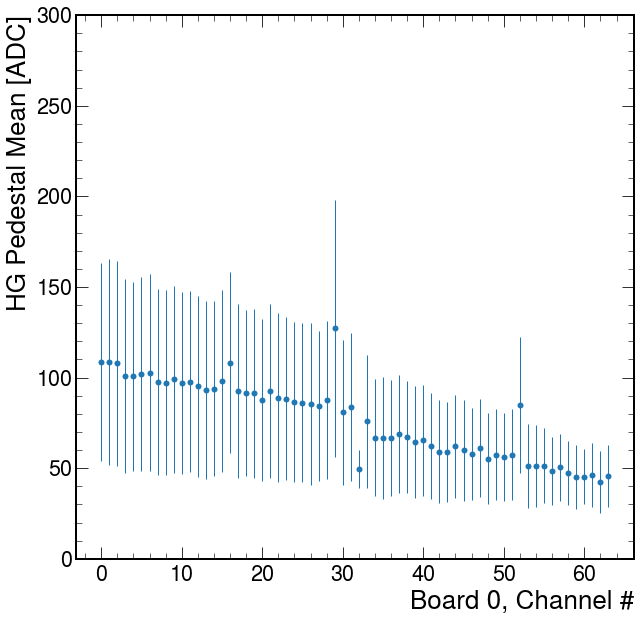

In [112]:
plt.errorbar(range(0,64), HGptrigs[0][0], yerr=HGptrigs[0][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,300)
plt.xlabel("Board 0, Channel #")
plt.ylabel("HG Pedestal Mean [ADC]")

Text(0, 1, 'HG Pedestal Mean [ADC]')

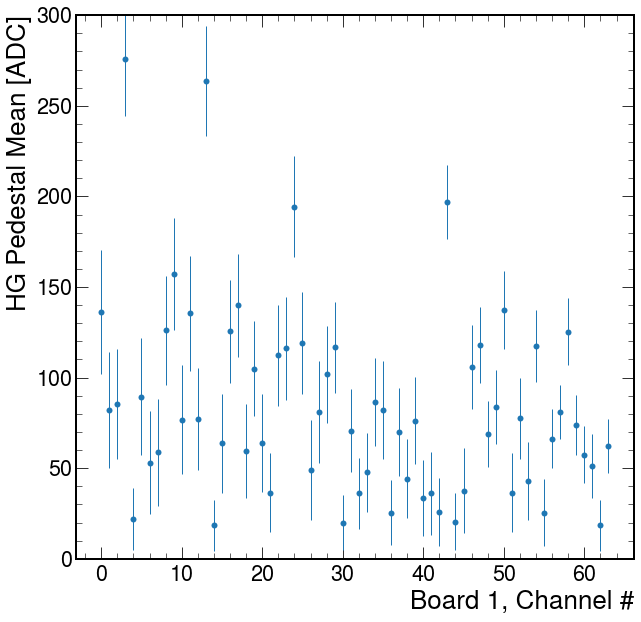

In [113]:
plt.errorbar(range(0,64), HGptrigs[1][0], yerr=HGptrigs[1][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,300)
plt.xlabel("Board 1, Channel #")
plt.ylabel("HG Pedestal Mean [ADC]")

Text(0, 1, 'HG Pedestal Mean [ADC]')

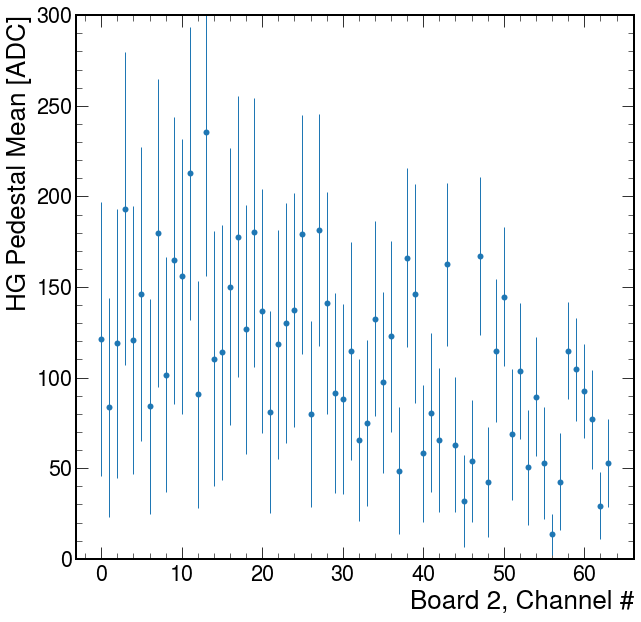

In [114]:
plt.errorbar(range(0,64), HGptrigs[2][0], yerr=HGptrigs[2][1], fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)

plt.ylim(0,300)
plt.xlabel("Board 2, Channel #")
plt.ylabel("HG Pedestal Mean [ADC]")